# Case Study: Donner Party

In [1]:
library(Sleuth2)
donner = case2001
Age = donner$Age
Sex = donner$Sex
Status = donner$Status

In [2]:
# contingency table
xtabs(~Status+Sex, data=donner)

          Sex
Status     Male Female
  Died       20      5
  Survived   10     10

In [3]:
summary(Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   15.0    24.0    28.0    31.8    40.0    65.0 

Response $Y_i=\{0,1\}$ survived or died <br>
Predictor: $X_i$ age/sex

#### Model
$Y_i\mid X_i=\mathbb{I}$(response is in category of interest)$\sim Bernoulli(\pi_i)$ <br>
$E(Y_i\mid X_i)=\pi_i, var(Y_i\mid X_i)=\pi_1(1-\pi_i)$

# Generalized Linear Models
Having response $Y$ can a set of explanatory variables $X_1,...,X_p$

Want $E(Y)$ as a linear function in the parameters, ie. $$g(E(Y))=X\beta$$

Key idea: find the link function $g$ such that the model is true

Some link functions

| link | function | usual distribution of $Y\mid X$ | 
| --- | --- | --- |
|identity| $$g(\mu)=\mu$$ | normal |
|log | $$g(\mu)=\log\mu,\mu>0$$ | Poisson(count data) |
|logistic | $$g(\mu)=\log(\mu/(1-\mu)),0<\mu<1$$ | Bernoulli(binary),Binomial |

## GLM vs. Transformation

- For transformation, transforming $Y$ so it has an approximate normal distribution with constant variance
- For GLM, distribution of $Y$ not restricted to Normal
- Model parameters describe $g(E(Y))$ rather than $E(g(Y))$
- GLM provide a unified theory of modeling that encompasses the most important models for continuous and discrete variables

# Binary Logistic Regression

- Let $\pi=P("success"),0<\pi<1$
- The **odds** in favor of success is $\frac{\pi}{1-\pi}$
- The **log odds** is $\log(\frac{\pi}{1-\pi})$

## Model
$\log(\frac{\pi}{1-\pi}) = \beta_0 + \beta_1X_1+...+\beta_pX_p$

Let the linear predictor $\eta=\beta_0 + \beta_1X_1+...+\beta_pX_p$, then **Logistic function** is $\pi(\eta)=\frac{e^{\eta}}{1+e^\eta}$

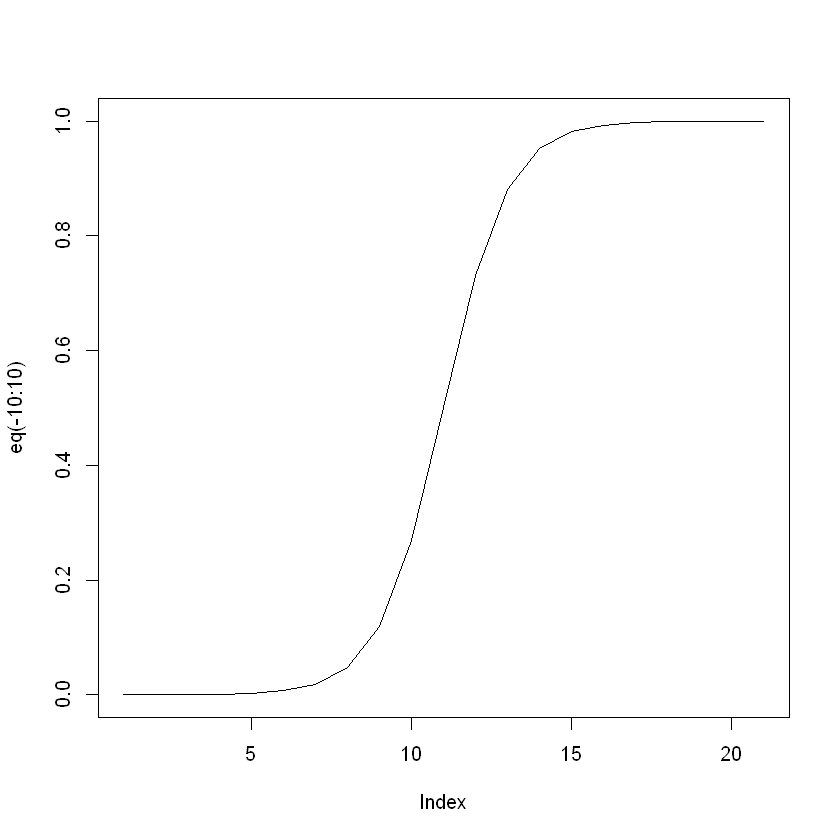

In [4]:
eq <- function(x){exp(x)/(1+exp(x))}
plot(eq(-10:10), type='l')

- log-odds $\log(\frac{\pi}{1-\pi})\in(-\infty, \infty)$, is increasing function.
- Predicts the natural log of the odds for a subject bing in one category or another
- Regression coefficients can be used to estimate odds ratio for each of the independent variables
- Tell which predictors can be used to determine if a subject was in a category of interest

## MLE
- Date: $Y_i=\mathbb{I}(\text{if response is in category of interest})$
- Model: $P(Y_i=y_1)=\pi_i^{y_{i}}(1-\pi_i)^{1-y_{i}}$
- Assumption: The observations are independent.
- Joint density: $P(Y_1=y_1,...,Y_n=y_n)=\prod_1^n \pi_i^{y_{i}}(1-\pi_i)^{1-y_{i}}$ where $\pi_i = \frac{\exp(\beta_0+\beta_1X_{i1}+...+\beta_pX_{ip})}{1+\exp(\beta_0+\beta_1X_{i1}+...+\beta_pX_{ip})}$

Likelihood function: plug in observed data and think of the joint density as a function of $\beta$'s
$$\mathcal{L}(\beta_0,...,\beta_p)=\prod_{1^n}\pi_i\vec\beta^{y_i}(1-\pi_i{\vec\beta})^{1-y_i}$$

There is no explicit expression for the max likelihood estimators. Two iterative numerical solution methods are Newton-Raphson algorithm and Fisher scoring or IWLS (In R, **glm()**)

In [5]:
# additive
fita<-glm(Status~Age+Sex, family=binomial, data=donner)
summary(fita)


Call:
glm(formula = Status ~ Age + Sex, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7445  -1.0441  -0.3029   0.8877   2.0472  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.63312    1.11018   1.471   0.1413  
Age         -0.07820    0.03728  -2.097   0.0359 *
SexFemale    1.59729    0.75547   2.114   0.0345 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 51.256  on 42  degrees of freedom
AIC: 57.256

Number of Fisher Scoring iterations: 4


In [6]:
anova(fita)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,44,61.82654
Age,1,5.535820,43,56.29072
Sex,1,5.034437,42,51.25628


In [7]:
# modelling "Died"
Status2 = relevel(Status, ref="Survived")
fitad <- glm(Status2 ~ Age + Sex, family=binomial, data=donner)
summary(fitad)


Call:
glm(formula = Status2 ~ Age + Sex, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0472  -0.8877   0.3029   1.0441   1.7445  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -1.63312    1.11018  -1.471   0.1413  
Age          0.07820    0.03728   2.097   0.0359 *
SexFemale   -1.59729    0.75547  -2.114   0.0345 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 51.256  on 42  degrees of freedom
AIC: 57.256

Number of Fisher Scoring iterations: 4


In [8]:
# Reference group as "Male"
Sex2 = relevel(Sex, ref="Male")
fitadf <- glm(Status2~Age + Sex2, family=binomial, data=donner)
summary(fitadf)


Call:
glm(formula = Status2 ~ Age + Sex2, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0472  -0.8877   0.3029   1.0441   1.7445  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -1.63312    1.11018  -1.471   0.1413  
Age          0.07820    0.03728   2.097   0.0359 *
Sex2Female  -1.59729    0.75547  -2.114   0.0345 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 51.256  on 42  degrees of freedom
AIC: 57.256

Number of Fisher Scoring iterations: 4


In [9]:
# Additive model for survived
fitasf <- glm(Status~Age + Sex2, family=binomial, data=donner)
summary(fitasf)


Call:
glm(formula = Status ~ Age + Sex2, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7445  -1.0441  -0.3029   0.8877   2.0472  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.63312    1.11018   1.471   0.1413  
Age         -0.07820    0.03728  -2.097   0.0359 *
Sex2Female   1.59729    0.75547   2.114   0.0345 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 51.256  on 42  degrees of freedom
AIC: 57.256

Number of Fisher Scoring iterations: 4


In [10]:
# the order of independent variable does not metter
fitsaf <- glm(Status~ Sex2+Age, family=binomial, data=donner)
summary(fitsaf)


Call:
glm(formula = Status ~ Sex2 + Age, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7445  -1.0441  -0.3029   0.8877   2.0472  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.63312    1.11018   1.471   0.1413  
Sex2Female   1.59729    0.75547   2.114   0.0345 *
Age         -0.07820    0.03728  -2.097   0.0359 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 51.256  on 42  degrees of freedom
AIC: 57.256

Number of Fisher Scoring iterations: 4


In [11]:
anova(fitasf)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,44,61.82654
Age,1,5.535820,43,56.29072
Sex2,1,5.034437,42,51.25628


In [12]:
anova(fitsaf)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,44,61.82654
Sex2,1,4.540267,43,57.28628
Age,1,6.029991,42,51.25628


In [13]:
# Higher order model with 3 higher order/interaction terms
fitfull <- glm(Status~Age + Sex2 + Age:Sex2+I(Age^2)+I(Age^2):Sex2, family=binomial, data=donner)
summary(fitfull)


Call:
glm(formula = Status ~ Age + Sex2 + Age:Sex2 + I(Age^2) + I(Age^2):Sex2, 
    family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3396  -0.9757  -0.3438   0.5269   1.5901  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)
(Intercept)         -3.318484   3.940184  -0.842    0.400
Age                  0.183031   0.226632   0.808    0.419
Sex2Female           0.265286  10.455222   0.025    0.980
I(Age^2)            -0.002803   0.002985  -0.939    0.348
Age:Sex2Female       0.299877   0.696050   0.431    0.667
Sex2Female:I(Age^2) -0.007356   0.010689  -0.688    0.491

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 45.361  on 39  degrees of freedom
AIC: 57.361

Number of Fisher Scoring iterations: 5


In [14]:
# interaction model
fitas <- glm(Status~Age*Sex2, family=binomial,data=donner)
summary(fitas)


Call:
glm(formula = Status ~ Age * Sex2, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2279  -0.9388  -0.5550   0.7794   1.6998  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)     0.31834    1.13103   0.281   0.7784  
Age            -0.03248    0.03527  -0.921   0.3571  
Sex2Female      6.92805    3.39887   2.038   0.0415 *
Age:Sex2Female -0.16160    0.09426  -1.714   0.0865 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 47.346  on 41  degrees of freedom
AIC: 55.346

Number of Fisher Scoring iterations: 5


In [15]:
anova(fitasf, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,44,61.82654,NA
Age,1,5.535820,43,56.29072,0.01863103
Sex2,1,5.034437,42,51.25628,0.02484816


In [16]:
vcov(fitasf, digits=3)

,(Intercept),Age,Sex2Female
(Intercept),1.23250837,-0.038472741,0.06007099
Age,-0.03847274,0.001390134,-0.00823197
Sex2Female,0.06007099,-0.008231970,0.57073339


In [17]:
cbind(bhat=coef(fitasf), confint.default(fitasf)) # CI for beta's

,bhat,2.5 %,97.5 %
(Intercept),1.63312031,-0.5428002,3.809040837
Age,-0.07820407,-0.1512803,-0.005127799
Sex2Female,1.59729350,0.1166015,3.077985503


In [18]:
exp(coef(fitasf)) # odd ratios

(Intercept)         Age  Sex2Female 
  5.1198252   0.9247757   4.9396452

In [19]:
exp(cbind(OR=coef(fitasf), confint.default(fitasf))) # Ci for odd ratios

,OR,2.5 %,97.5 %
(Intercept),5.1198252,0.5811187,45.1071530
Age,0.9247757,0.8596067,0.9948853
Sex2Female,4.9396452,1.1236716,21.7146143


## Wald Chi-sq Procedures
logistic regression inference on a single $\beta$  
- Hypotheses: $H_0:\beta_j=0,H_a:\beta_j\neq 0$
- Test statistic: $z=\hat\beta_j/se(\hat\beta_j)$, $\hat\beta_j$ is MLE for $\beta_j$
- By standard large-sample results, MLE's are normally distributed. Thus, for large $n$, under $H_0$, z is an observation from an approx. $N(0,1)$. Note that $Z^2\sim \chi_1$, we can use chisq for p-value
- 95% CI: $\hat\beta_j \pm 1.96se(\hat\beta_j)$

Since the logistic function is monotonic, we can expand CI by doing monotonic transformation (e.x. multiplication and exp)

In [20]:
# Wald test
library(aod)
wald.test(Sigma=vcov(fitasf), b=coef(fitasf), Terms=2:3)

Wald test:
----------

Chi-squared test:
X2 = 6.9, df = 2, P(> X2) = 0.032

In [21]:
wald.test(Sigma=vcov(fitas), b=coef(fitas), Terms=4)

Wald test:
----------

Chi-squared test:
X2 = 2.9, df = 1, P(> X2) = 0.086

## Model Assumptions
- Underlying probability model for response is Bernoulli
- Observations are independent
- The form of the model is correct
 - Linear relationship between logits and explanatory variables
 - All relevant variables are included; irrelevant ones excluded
- Sample size is large enough for valid inference

B Logistic R vs. Linear R
- both utilize MLR's for the $\beta$'s
- Less assumption to check for than in linear regression
 - No need to check for outliers
 - No residual plots
 - Variance is not constant
 
Need to test
- (designing aspect) Independence of observations 
- (inference) Form of the model: test higher-order terms such as non-linear in X, interaction, and higher order interaction

### Wald cs. LRT test
- Walk test on single $\beta = 0$, LRT find $k\geq 1$ $\beta$'s. 
- LRT compares nested models
- LRT allow small to moderate sample sizes $\beta$ near boundary of parameter space

## Comparing models: Likelihood Ratio Test
- Idea: compare likelihood of data under Full model, $\mathcal{L}_F$ to likelihood under REDUCED model $\mathcal{L}_R$ of same data. the likelihood ratio $\mathcal{L}_R/\mathcal{L}F$ where $\mathcal{L}_R\leq \mathcal{L}_F$
- Hypothesis: $H_0:\beta_1=...\beta_k=0$ (Reduced model is appropriate, fits data as swll as Full model)$H_a:$ at least one of betas is not 0 (full model is better)
- Test statistic: Deviance (residual)
$$G^2 = -2\log\mathcal{L}_R - (-2\log\mathcal{L}_F)=-2\log(\mathcal{L}_R/\mathcal{L}_F)\sim \chi^2_k$$
For large $n$, under $H_0$, $G^2$ is an observation from a chi-square distribution with $k$ d.f.

# Exercise
Models 

\begin{align*}
log(\frac{\pi_i}{1-\pi_i}) &= \\&(1) a_0+a_1Age_i+a_2I_{Female, i}\\ 
&(2) \beta_0 +\beta_1Age_i+\beta_2 I_{female_i,i} + \beta_3Age_i*I_{female,i}+\beta_4Age_i^2 + \beta_5Age_i^2*I_{Female, i} \\
&(3) \gamma_0 + \gamma_1Age_i + \gamma_2I_{Female, i} + \gamma_3Age_i *I_{Female, i}\end{align*}

In [22]:
# additive model (model 1)
fitadd <- glm(Status~Age + Sex, family=binomial, donner)
summary(fitadd)


Call:
glm(formula = Status ~ Age + Sex, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7445  -1.0441  -0.3029   0.8877   2.0472  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.63312    1.11018   1.471   0.1413  
Age         -0.07820    0.03728  -2.097   0.0359 *
SexFemale    1.59729    0.75547   2.114   0.0345 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 51.256  on 42  degrees of freedom
AIC: 57.256

Number of Fisher Scoring iterations: 4


In [23]:
# full model (model 2)
fitfull <- glm(Status~Age + Sex + Age: Sex + I(Age^2) + I(Age^2):Sex, 
               family=binomial, donner)
summary(fitfull)


Call:
glm(formula = Status ~ Age + Sex + Age:Sex + I(Age^2) + I(Age^2):Sex, 
    family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3396  -0.9757  -0.3438   0.5269   1.5901  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)        -3.318484   3.940184  -0.842    0.400
Age                 0.183031   0.226632   0.808    0.419
SexFemale           0.265286  10.455222   0.025    0.980
I(Age^2)           -0.002803   0.002985  -0.939    0.348
Age:SexFemale       0.299877   0.696050   0.431    0.667
SexFemale:I(Age^2) -0.007356   0.010689  -0.688    0.491

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 45.361  on 39  degrees of freedom
AIC: 57.361

Number of Fisher Scoring iterations: 5


In [24]:
# interative model (model 3)
fitint <- glm(Status~Age*Sex, family=binomial, donner)
summary(fitint)


Call:
glm(formula = Status ~ Age * Sex, family = binomial, data = donner)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2279  -0.9388  -0.5550   0.7794   1.6998  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)    0.31834    1.13103   0.281   0.7784  
Age           -0.03248    0.03527  -0.921   0.3571  
SexFemale      6.92805    3.39887   2.038   0.0415 *
Age:SexFemale -0.16160    0.09426  -1.714   0.0865 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.827  on 44  degrees of freedom
Residual deviance: 47.346  on 41  degrees of freedom
AIC: 55.346

Number of Fisher Scoring iterations: 5


In [25]:
# p-value for model2 vs. model1
1 - pchisq(5.895, 3)

[1] 0.116832

Q1 - Using R output determine whether a model with the 3 higher order polynomial terms and interaction term is an improvement over the additive model


Higher order interaction vs. additive
Hypotheses: $H_0:\beta_3=\beta_4=\beta_5 = 0$

Test statistic $G^2 = 51.256 - 45.361 = 5.895\sim \chi^2_3$

p-value: 0.12

Conclusion: There is some evidence that the additive model is better than the higher order model


Q2 - determine whether the effect of Age on the odds of survival differ with Sex

Hypothesis: $H_0: \gamma_3 = 0$

Test statistic (LRT): $51.256 - 47.346 = 3.91\sim \chi^2_1$

p-value(LRT): 0.048

Test statistic (Wald): $-0.16160/0.09426 = -1.71\sim N(0,1)$

p-value(Wald): 0.0865
 
(Shown in R-output)

Conclusion: There is inconclusive evidence that the interactive model is better than the additive model

In [26]:
# p-value for Q2 LRT
1 - pchisq(51.256-47.346, 1)

[1] 0.0479996

Q3 - determine whether or not the additive model fits better then the Null model

Hypothesis: $H_0: a_i = 0, i\neq 0$

Test statistic: $G^2 = 61.827 - 51.256=10.571\sim \chi_2^2$

p-value: 0.005

Conclusion: There is strong evidence that age and sex are relevant factors for estimating the odds of survival

In [27]:
# p-value for Q3
1 - pchisq(61.827-51.256, 2)

[1] 0.005064499

# AIC & BIC
Akaike's Information Criterion  
$AIC=-2log\mathcal{L}+2(p+1)$  
Schwarz's (Bayesian Information) Criterion  
$-2log\mathcal{L}+(p+1)\log N$  
$p$ number of variables, $N$ sample size

Smaller means better model fit  
BIC applies stronger penalty for model complexity than AIC

AIC Rule of Thumb: one model fits better if $diff(AIC) > 10$, equivalent if $diff(AIC)<2$

For the example, we can choose the simplest additive model



# Estimated probability of survival

In [28]:
phats <- predict.glm(fitasf, type="response")
phats[1:5]

1         2         3         4         5 
0.4587010 0.5255405 0.1831661 0.3289359 0.3643360

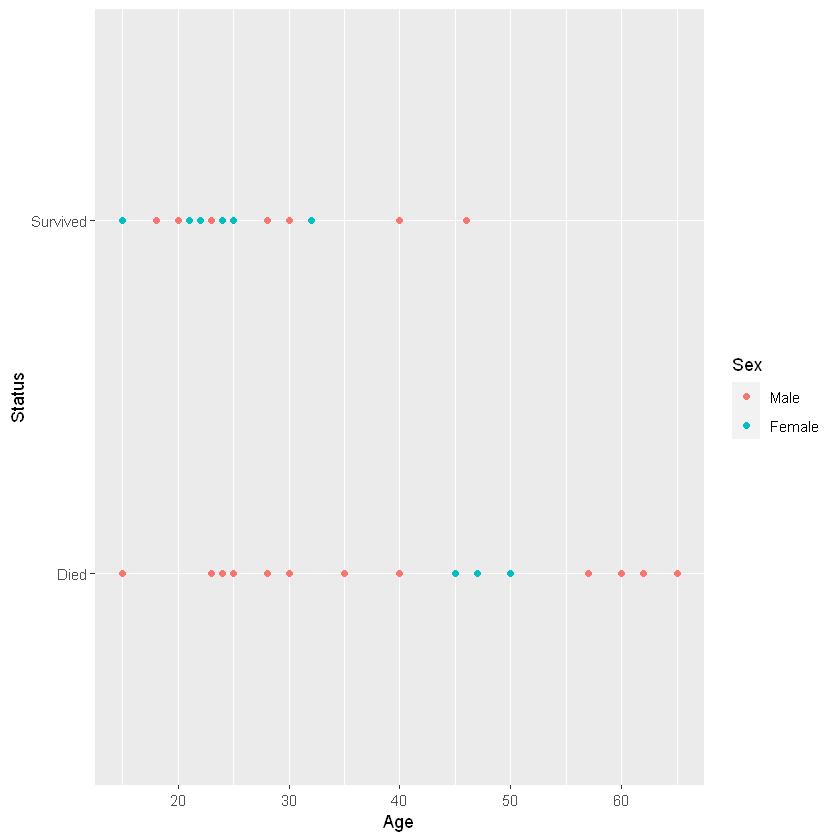

In [29]:
library(ggplot2)
ggplot(donner, aes(x=Age, y=Status, color=Sex))+geom_point()

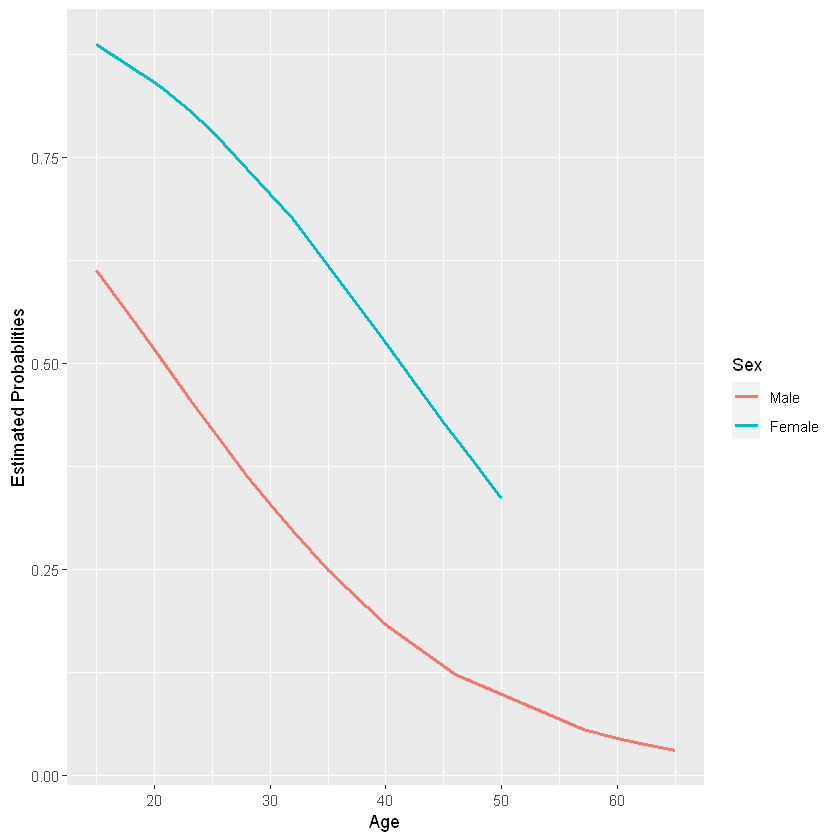

In [30]:
ggplot(donner, aes(x=Age, y=phats)) + ylab("Estimated Probablities")+geom_line(aes(color=Sex), size=1)